# Cleaning and preparing data for Model Training

# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

In [2]:
#importing the training data

df_train=pd.read_csv('blackfriday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#importing the test data

df_test=pd.read_csv('blackfriday_test.csv')
df_test.head()

#Note there is no putput i.e. purchase column as in training dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [11]:
# Combining(Appending) both datasets so that any data pre processing is applied to both

df=pd.concat([df_test,df_train],sort=True)
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,46-50,B,M,1,7,1,11.0,NaN,P00128942,NaN,2,1000004
1,26-35,C,M,0,17,3,5.0,NaN,P00113442,NaN,0,1000009
2,36-45,B,F,1,1,5,14.0,NaN,P00288442,NaN,4+,1000010
3,36-45,B,F,1,1,4,9.0,NaN,P00145342,NaN,4+,1000010
4,26-35,C,F,0,1,4,5.0,12.0,P00053842,NaN,1,1000011


In [12]:
df.shape

(783667, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         783667 non-null  object 
 1   City_Category               783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Marital_Status              783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          537685 non-null  float64
 7   Product_Category_3          237858 non-null  float64
 8   Product_ID                  783667 non-null  object 
 9   Purchase                    550068 non-null  float64
 10  Stay_In_Current_City_Years  783667 non-null  object 
 11  User_ID                     783667 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [14]:
df.describe()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,7.836670e+05
mean,0.409777,8.079300,5.366196,9.844506,12.668605,9263.968713,1.003029e+06
std,0.491793,6.522206,3.878160,5.089093,4.125510,5023.065394,1.727267e+03
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,1.000001e+06
25%,0.000000,2.000000,1.000000,5.000000,9.000000,5823.000000,1.001519e+06
50%,0.000000,7.000000,5.000000,9.000000,14.000000,8047.000000,1.003075e+06
75%,1.000000,14.000000,8.000000,15.000000,16.000000,12054.000000,1.004478e+06
max,1.000000,20.000000,20.000000,18.000000,18.000000,23961.000000,1.006040e+06


In [15]:
#UserID will not be useful and hence will be dropped

df.drop(['User_ID'],axis=1,inplace=True)

In [16]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,46-50,B,M,1,7,1,11.0,NaN,P00128942,NaN,2
1,26-35,C,M,0,17,3,5.0,NaN,P00113442,NaN,0
2,36-45,B,F,1,1,5,14.0,NaN,P00288442,NaN,4+
3,36-45,B,F,1,1,4,9.0,NaN,P00145342,NaN,4+
4,26-35,C,F,0,1,4,5.0,12.0,P00053842,NaN,1


In [17]:
#Handling the categorical features so that they can be interpreted by the model which will be created

#First handling Gender and directly withinn the dataframe 

df['Gender']=df['Gender'].map({'M':1,'F':0})
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,46-50,B,1,1,7,1,11.0,NaN,P00128942,NaN,2
1,26-35,C,1,0,17,3,5.0,NaN,P00113442,NaN,0
2,36-45,B,0,1,1,5,14.0,NaN,P00288442,NaN,4+
3,36-45,B,0,1,1,4,9.0,NaN,P00145342,NaN,4+
4,26-35,C,0,0,1,4,5.0,12.0,P00053842,NaN,1


In [ ]:
#Another way

# df['Gender']=pd.get_dummies(df['Gender'],drop_first=True)

In [18]:
# Now handling age as age is given as a range instead of a specific value

df['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [19]:
#Applying ordinal encoding in this case because one hot encoding will increase dimensions isn't a good practice

df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

#label encoding can also be used

In [20]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,5,B,1,1,7,1,11.0,NaN,P00128942,NaN,2
1,3,C,1,0,17,3,5.0,NaN,P00113442,NaN,0
2,4,B,0,1,1,5,14.0,NaN,P00288442,NaN,4+
3,4,B,0,1,1,4,9.0,NaN,P00145342,NaN,4+
4,3,C,0,0,1,4,5.0,12.0,P00053842,NaN,1


In [23]:
# Handling City_Category

df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [24]:
df_city.head()

,B,C
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [27]:
df=pd.concat([df,df_city],axis=1)

In [28]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,5,B,1,1,7,1,11.0,NaN,P00128942,NaN,2,1,0
1,3,C,1,0,17,3,5.0,NaN,P00113442,NaN,0,0,1
2,4,B,0,1,1,5,14.0,NaN,P00288442,NaN,4+,1,0
3,4,B,0,1,1,4,9.0,NaN,P00145342,NaN,4+,1,0
4,3,C,0,0,1,4,5.0,12.0,P00053842,NaN,1,0,1


In [32]:
#Now we can drop the city category
df.drop(['City_Category'],axis=1,inplace=True)

In [33]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,5,1,1,7,1,11.0,NaN,P00128942,NaN,2,1,0
1,3,1,0,17,3,5.0,NaN,P00113442,NaN,0,0,1
2,4,0,1,1,5,14.0,NaN,P00288442,NaN,4+,1,0
3,4,0,1,1,4,9.0,NaN,P00145342,NaN,4+,1,0
4,3,0,0,1,4,5.0,12.0,P00053842,NaN,1,0,1


In [34]:
# Now handling missing values

df.isnull().mean()

Age                           0.000000
Gender                        0.000000
Marital_Status                0.000000
Occupation                    0.000000
Product_Category_1            0.000000
Product_Category_2            0.313886
Product_Category_3            0.696481
Product_ID                    0.000000
Purchase                      0.298085
Stay_In_Current_City_Years    0.000000
B                             0.000000
C                             0.000000
dtype: float64

In [35]:
df.isnull().sum()

Age                                0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
B                                  0
C                                  0
dtype: int64

In [36]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
#Note that the purchase being null in df dataframe is of test dataset and should be null
#but product_category needs to be handled

In [37]:
df['Product_Category_2'].unique()

array([11.,  5., 14.,  9.,  3.,  4., 13.,  2., nan,  8., 15., 17., 12.,
       16.,  6., 10., 18.,  7.])

In [38]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [ ]:
#We will replace with mode in case of a discrete feature(Product_Category_2)

In [41]:
df['Product_Category_2'].mode()[0]

8.0

In [43]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [44]:
df['Product_Category_2'].isnull().sum()

0

In [ ]:
#We will replace with mode in case of a discrete feature(Product_Category_3)

In [45]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [46]:
df['Product_Category_2'].isnull().sum()

0

In [47]:
df.isnull().sum()

Age                                0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
B                                  0
C                                  0
dtype: int64

In [48]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,5,1,1,7,1,11.0,16.0,P00128942,NaN,2,1,0
1,3,1,0,17,3,5.0,16.0,P00113442,NaN,0,0,1
2,4,0,1,1,5,14.0,16.0,P00288442,NaN,4+,1,0
3,4,0,1,1,4,9.0,16.0,P00145342,NaN,4+,1,0
4,3,0,0,1,4,5.0,12.0,P00053842,NaN,1,0,1


In [49]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [51]:
# We want to remove the plus here

df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

/var/folders/00/wnnvntqn3wzfy8srhwpzh39m0000gn/T/ipykernel_88897/4236449.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [53]:
df['Stay_In_Current_City_Years'].unique()


array(['2', '0', '4', '1', '3'], dtype=object)

In [52]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,5,1,1,7,1,11.0,16.0,P00128942,NaN,2,1,0
1,3,1,0,17,3,5.0,16.0,P00113442,NaN,0,0,1
2,4,0,1,1,5,14.0,16.0,P00288442,NaN,4,1,0
3,4,0,1,1,4,9.0,16.0,P00145342,NaN,4,1,0
4,3,0,0,1,4,5.0,12.0,P00053842,NaN,1,0,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         783667 non-null  int64  
 1   Gender                      783667 non-null  int64  
 2   Marital_Status              783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Product_Category_1          783667 non-null  int64  
 5   Product_Category_2          783667 non-null  float64
 6   Product_Category_3          783667 non-null  float64
 7   Product_ID                  783667 non-null  object 
 8   Purchase                    550068 non-null  float64
 9   Stay_In_Current_City_Years  783667 non-null  object 
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 83.4+ MB


In [ ]:
#Stay_In_Current_City_Years has datatype as object whereas it should be integer, we will try and change that

In [55]:
#Convert Object into integer

df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         783667 non-null  int64  
 1   Gender                      783667 non-null  int64  
 2   Marital_Status              783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Product_Category_1          783667 non-null  int64  
 5   Product_Category_2          783667 non-null  float64
 6   Product_Category_3          783667 non-null  float64
 7   Product_ID                  783667 non-null  object 
 8   Purchase                    550068 non-null  float64
 9   Stay_In_Current_City_Years  783667 non-null  int64  
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 83.4+ MB


In [56]:
#B,C has datatype as uint8 whereas it should be integer, we will try and change that

df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         783667 non-null  int64  
 1   Gender                      783667 non-null  int64  
 2   Marital_Status              783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Product_Category_1          783667 non-null  int64  
 5   Product_Category_2          783667 non-null  float64
 6   Product_Category_3          783667 non-null  float64
 7   Product_ID                  783667 non-null  object 
 8   Purchase                    550068 non-null  float64
 9   Stay_In_Current_City_Years  783667 non-null  int64  
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 93.9+ MB


/opt/homebrew/lib/python3.10/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

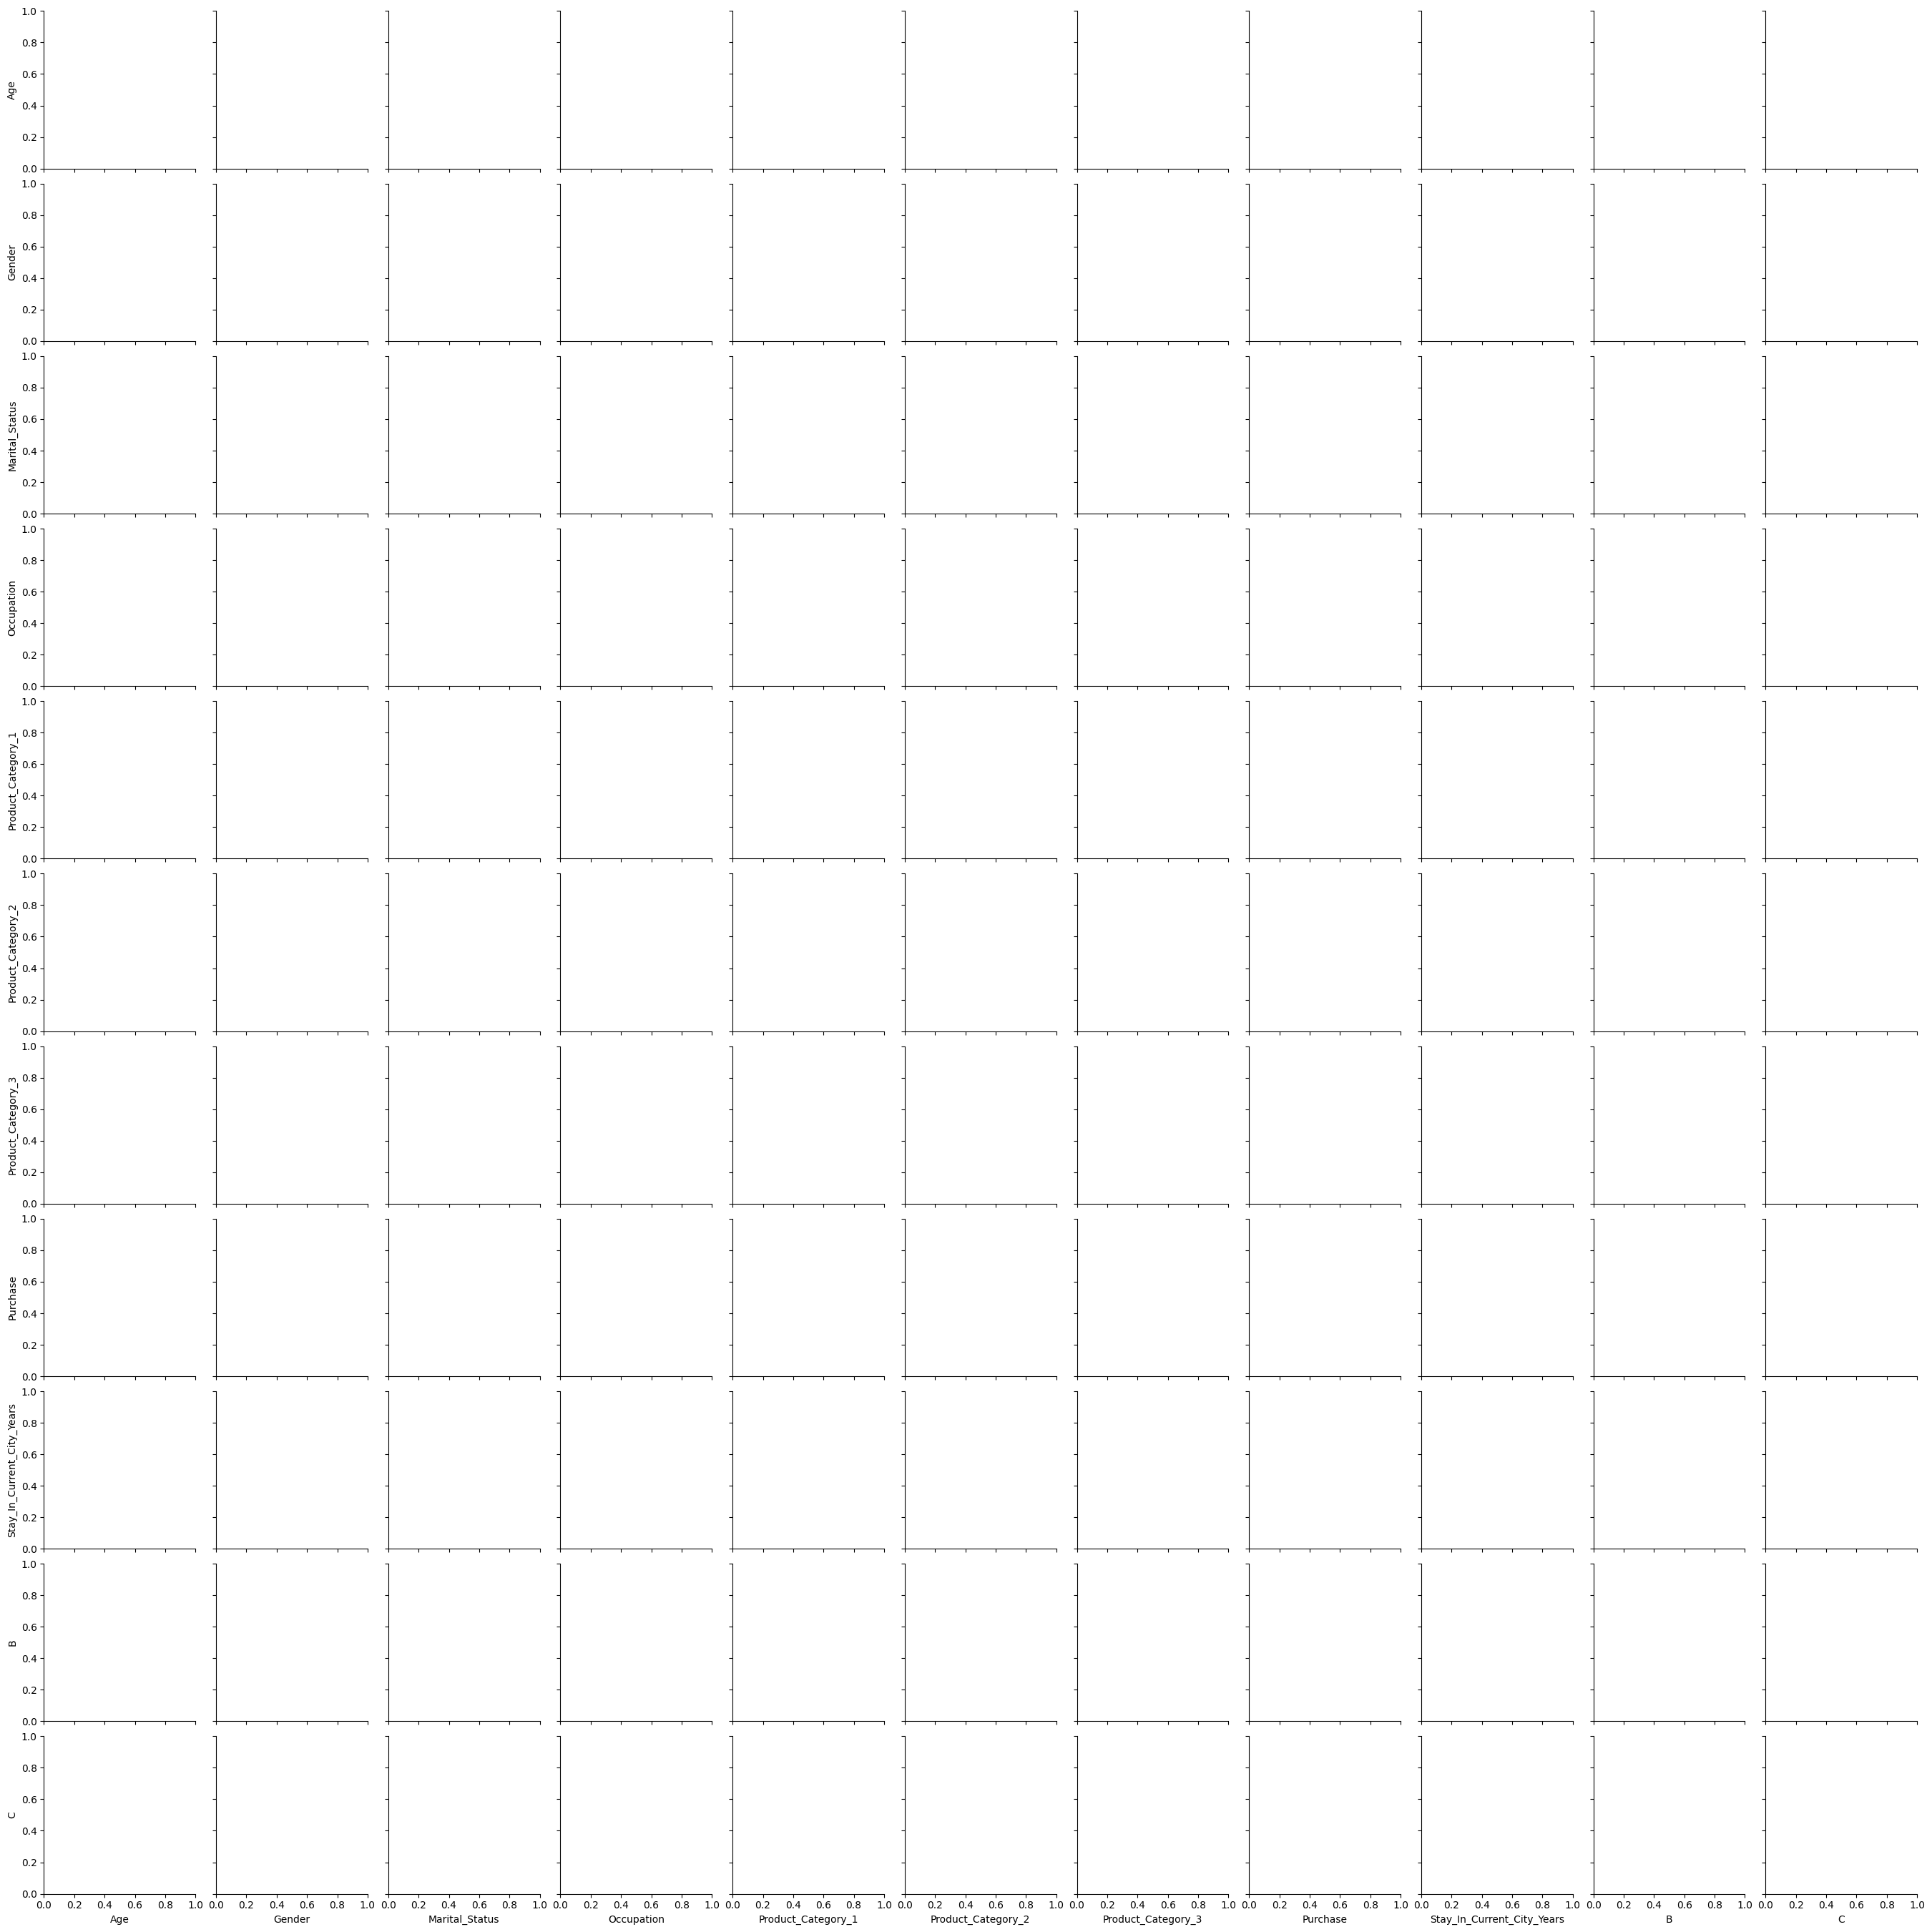

In [57]:
#Visualization

sns.pairplot(df)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

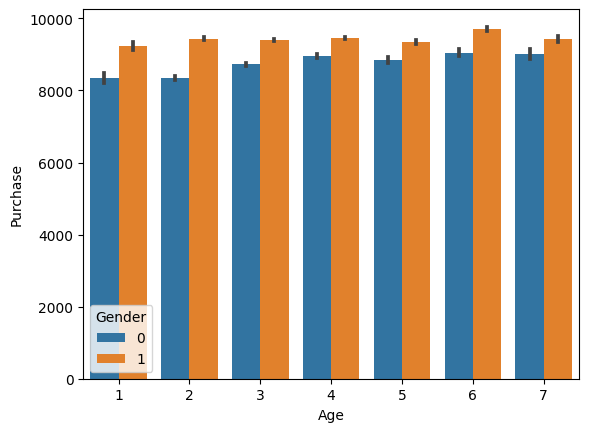

In [58]:
#Visualization of purchase with age

sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

Observations:
In each age group, the purchasing range is almost similar but in every age group males(1) have purchased more than females

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

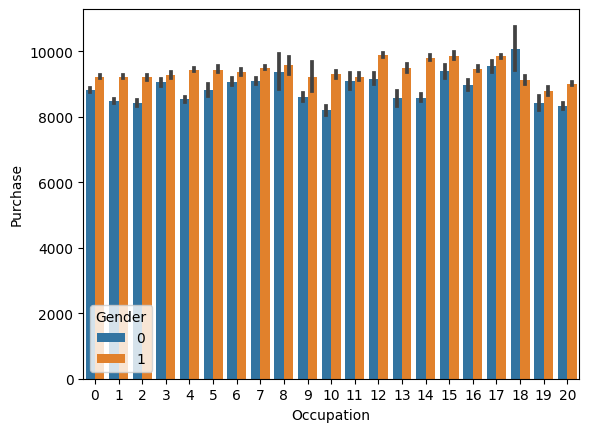

In [59]:
#Visualization of purchase with occupation

sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

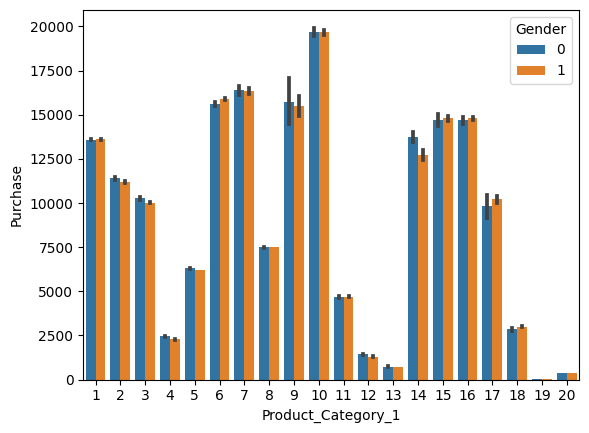

In [61]:
#Visualization of purchase with Product_Category_1 

sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

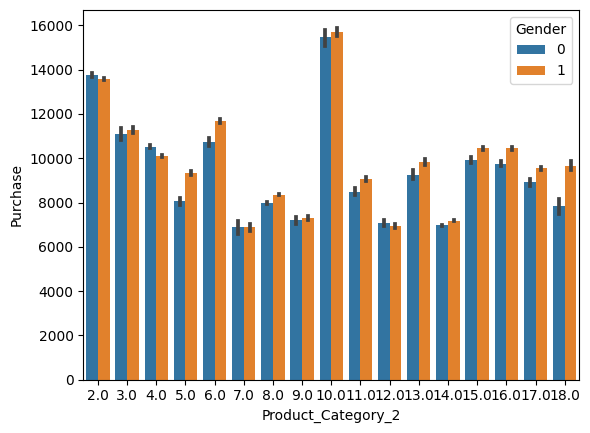

In [62]:
#Visualization of purchase with Product_Category_2 

sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

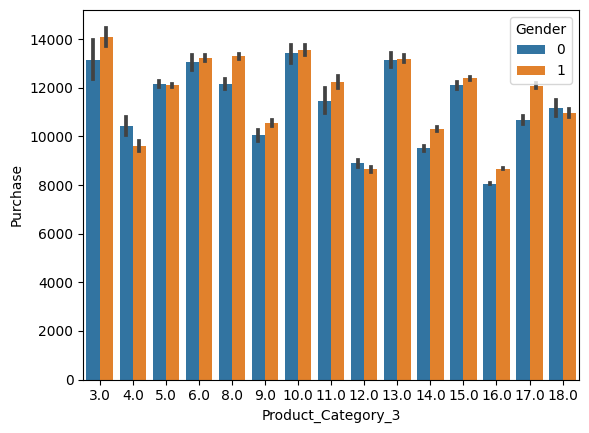

In [63]:
#Visualization of purchase with Product_Category_3

sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

Observations:
Product_Category_1 is bought the most,its scale is till 20000 which is significantly higher than Product_Category_2 and Product_Category_3

In [69]:
#Splitting into new test and train data
df_test=df[df['Purchase'].isnull()]
df_test.head()
#New test data

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,5,1,1,7,1,11.0,16.0,P00128942,NaN,2,1,0
1,3,1,0,17,3,5.0,16.0,P00113442,NaN,0,0,1
2,4,0,1,1,5,14.0,16.0,P00288442,NaN,4,1,0
3,4,0,1,1,4,9.0,16.0,P00145342,NaN,4,1,0
4,3,0,0,1,4,5.0,12.0,P00053842,NaN,1,0,1


In [70]:
df_train=df[~df['Purchase'].isnull()]

df_train.head()

#New training data

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,7969.0,4,0,1


In [ ]:
#Train Test Split

In [71]:
X=df_train.drop('Purchase',axis=1)
X.head()

#Removed dependent feature

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,4,0,1


In [96]:
X.drop(['Product_ID'],axis=1)

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,2,0,0
1,1,0,0,10,1,6.0,14.0,2,0,0
2,1,0,0,10,12,8.0,16.0,2,0,0
3,1,0,0,10,12,14.0,16.0,2,0,0
4,7,1,0,16,8,8.0,16.0,4,0,1
...,...,...,...,...,...,...,...,...,...,...
550063,6,1,1,13,20,8.0,16.0,1,1,0
550064,3,0,0,1,20,8.0,16.0,3,0,1
550065,3,0,1,15,20,8.0,16.0,4,1,0
550066,7,0,0,1,20,8.0,16.0,2,0,1


In [72]:
y=df_train['Purchase']
y.head()

#Only dependent feature

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [79]:
X_train.drop(['Product_ID'],axis=1,inplace=True)

In [80]:
X_test.drop(['Product_ID'],axis=1,inplace=True)

In [81]:
# Now to perform feature scaling, we'll do min max scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [82]:
#Now, to train a model for prediction

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
#Examining the model coefficients
print(model.coef_)

[  161.48399281   219.40340889   -29.40171369    40.75197867
 -1595.03999038    -6.24829968  -421.6489872     13.00328258
    76.37138564   311.82740972]


In [84]:
#Intercept of the regression model

print(model.intercept_)


9260.52247622407


In [91]:
X.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,P00069042,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,4,0,1


In [97]:
pd.DataFrame(model.coef_,X.drop(['Product_ID'],axis=1).columns, columns = ['Coeff'])

#Visualization of the coefficients for each category

,Coeff
Age,161.483993
Gender,219.403409
Marital_Status,-29.401714
Occupation,40.751979
Product_Category_1,-1595.039990
Product_Category_2,-6.248300
Product_Category_3,-421.648987
Stay_In_Current_City_Years,13.003283
B,76.371386
C,311.827410


In [98]:
#Predictions from the model

predictions = model.predict(X_test)

#Predictions stored in predictions variable

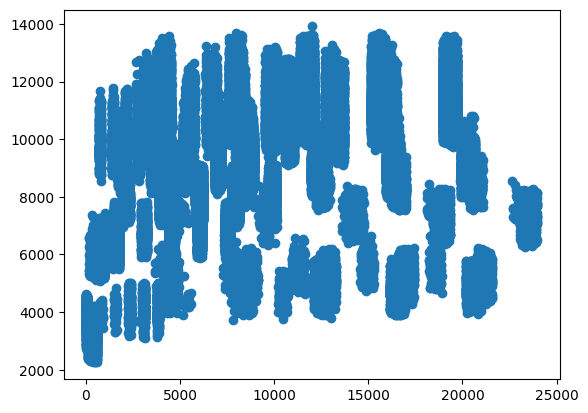

In [99]:
#Plot these predicted values against the real values

plt.scatter(y_test, predictions)

Nothing clear from here, a diagonal line is a good indication

(array([ 2005., 16808., 38687., 57310., 27996., 17443., 13554.,  4090.,
         1690.,  1940.]),
 array([-10901.09363831,  -8061.16897794,  -5221.24431757,  -2381.31965719,
           458.60500318,   3298.52966355,   6138.45432392,   8978.3789843 ,
         11818.30364467,  14658.22830504,  17498.15296542]),
 <BarContainer object of 10 artists>)

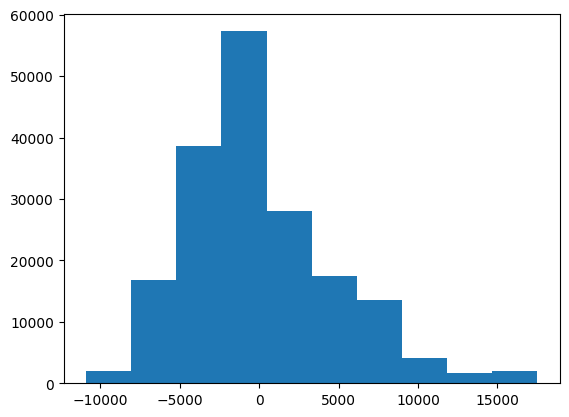

In [100]:
#Plotting the residuals, i.e. the difference between the real values an the predicted values

plt.hist(y_test - predictions)

This is a good sign since the distribution is gaussian which generally, implies that an appropriate model is selected for the dataset

Now, Testing the performance:

In [101]:
from sklearn import metrics

In [102]:
#Mean absolute error

metrics.mean_absolute_error(y_test, predictions)

3577.2377941856694

In [104]:
#Mean squared error

metrics.mean_squared_error(y_test, predictions)

21939163.32153543

In [105]:
#Root mean squared error

np.sqrt(metrics.mean_squared_error(y_test, predictions))

4683.926058504279

Observations: The error values are too high, which means some other model will have to be applied for predicting the values